<a href="https://colab.research.google.com/github/krolikmary/RossServer/blob/master/%D0%9B%D0%B0%D0%B15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Зайцева Мария - Вартант 13 - Car price prediction (mercedes)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
!echo '{"username":"krolikmary","key":"as34ww11"}' > kaggle.json
!mkdir /root/.kaggle
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!ls /root/.kaggle/

kaggle.json


In [3]:
!kaggle datasets download -d adityadesai13/used-car-dataset-ford-and-mercedes

Dataset URL: https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes
License(s): CC0-1.0
  0% 0.00/1.10M [00:00<?, ?B/s]
100% 1.10M/1.10M [00:00<00:00, 109MB/s]


In [4]:
!unzip used-car-dataset-ford-and-mercedes

Archive:  used-car-dataset-ford-and-mercedes.zip
  inflating: audi.csv                
  inflating: bmw.csv                 
  inflating: cclass.csv              
  inflating: focus.csv               
  inflating: ford.csv                
  inflating: hyundi.csv              
  inflating: merc.csv                
  inflating: skoda.csv               
  inflating: toyota.csv              
  inflating: unclean cclass.csv      
  inflating: unclean focus.csv       
  inflating: vauxhall.csv            
  inflating: vw.csv                  


In [5]:
df = pd.read_csv('merc.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


### Описание показателей
<ul>
    <li>Model - модель</li>
    <li>Year - год производства</li>
    <li>Price - цена</li>
    <li>Transmission - тип коробки передач</li>
    <li>Mileage - пробег</li>
    <li>Fuel Type - тип топлива</li>
    <li>Tax - налог на автомобиль (в фунтах)</li>
    <li>Mpg - расход топлива (миль на галлон)</li>
    <li>Engine Size - объем двигателя</li>
</ul>

# 1. Описательный анализ

<Figure size 1500x1000 with 0 Axes>

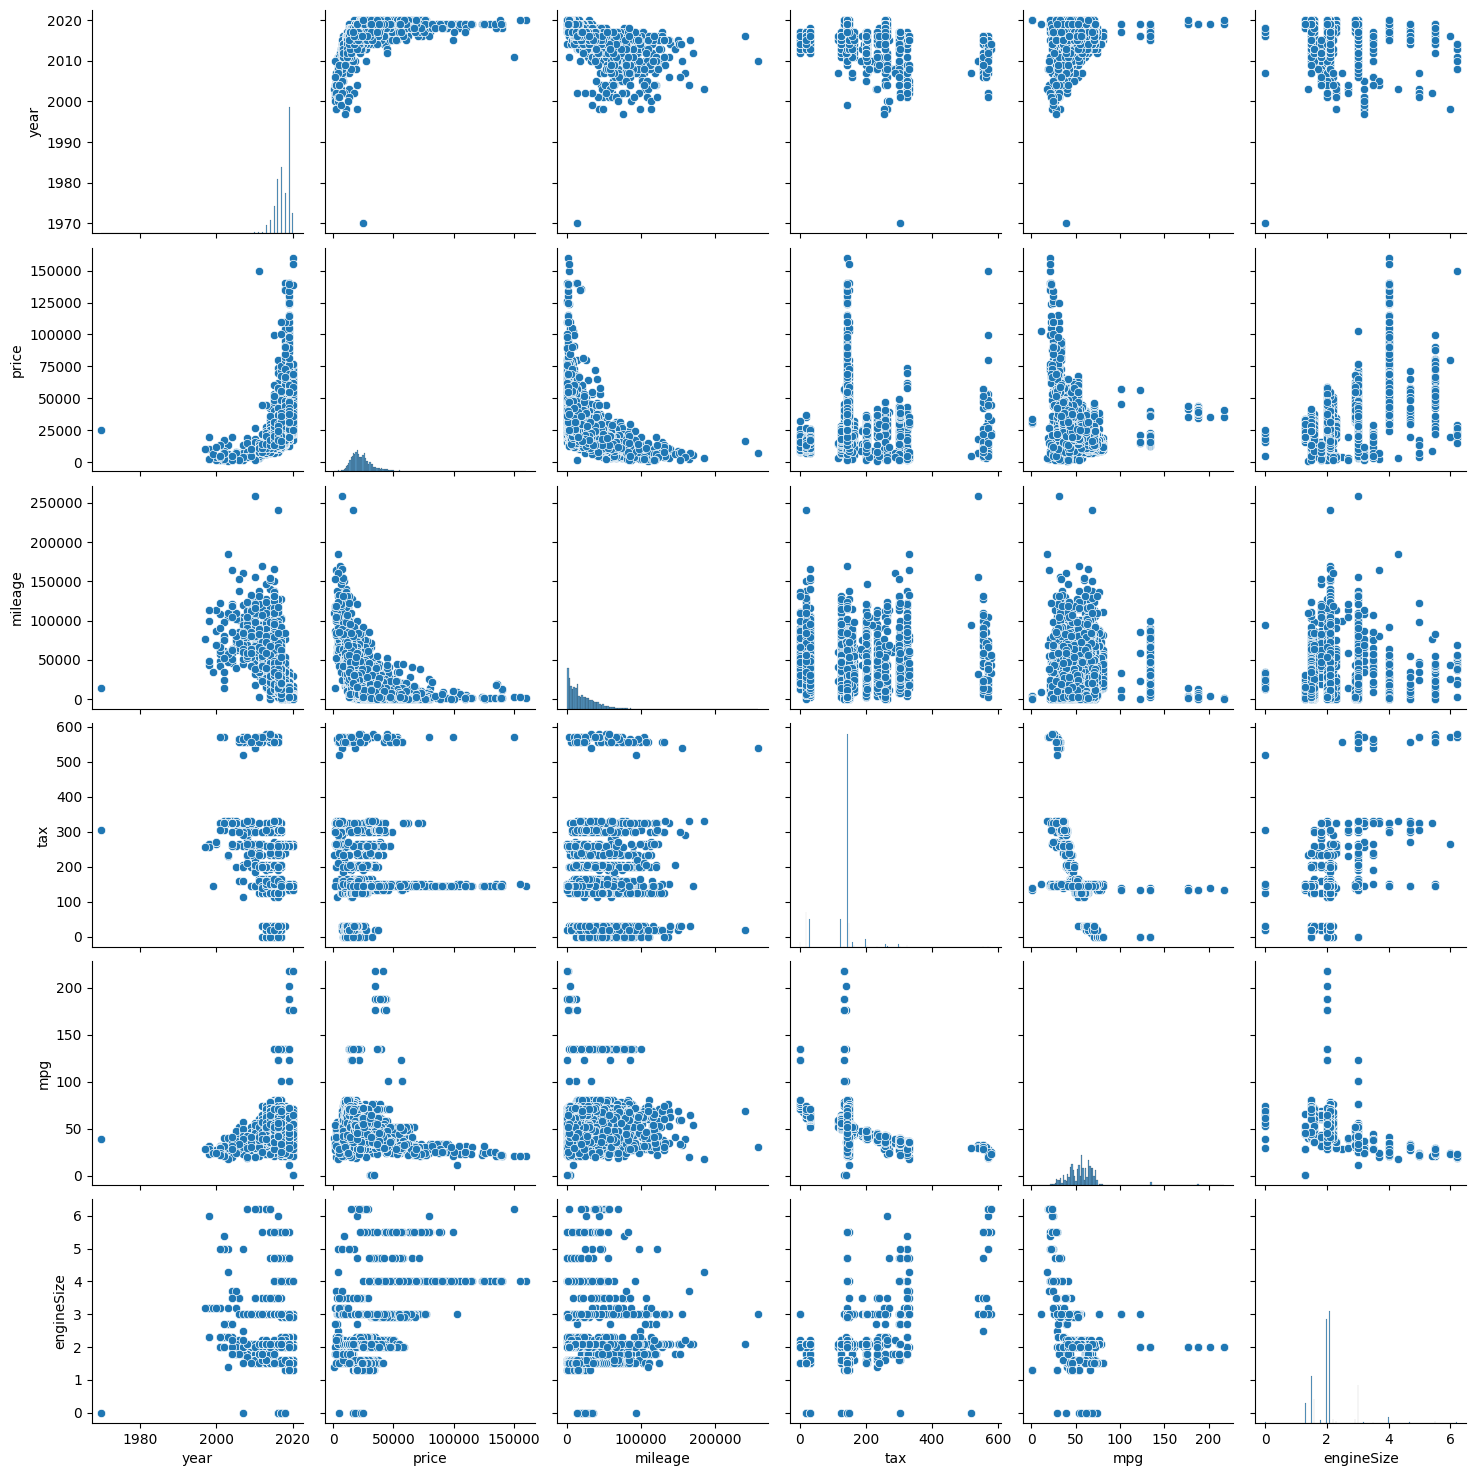

In [7]:
plt.figure(figsize = (15, 10))
sns.pairplot(df)

In [8]:
data = df.drop('price', axis = 1)
y = df['price']
y

,price
0,5200
1,34948
2,49948
3,61948
4,73948
...,...
13114,35999
13115,24699
13116,30999
13117,37990


In [11]:
data['model'].unique()

array([' SLK', ' S Class', ' SL CLASS', ' G Class', ' GLE Class',
       ' GLA Class', ' A Class', ' B Class', ' GLC Class', ' C Class',
       ' E Class', ' GL Class', ' CLS Class', ' CLC Class', ' CLA Class',
       ' V Class', ' M Class', ' CL Class', ' GLS Class', ' GLB Class',
       ' X-CLASS', '180', ' CLK', ' R Class', '230', '220', '200'],
      dtype=object)

распределение цен по годам:

<Axes: xlabel='year', ylabel='price'>

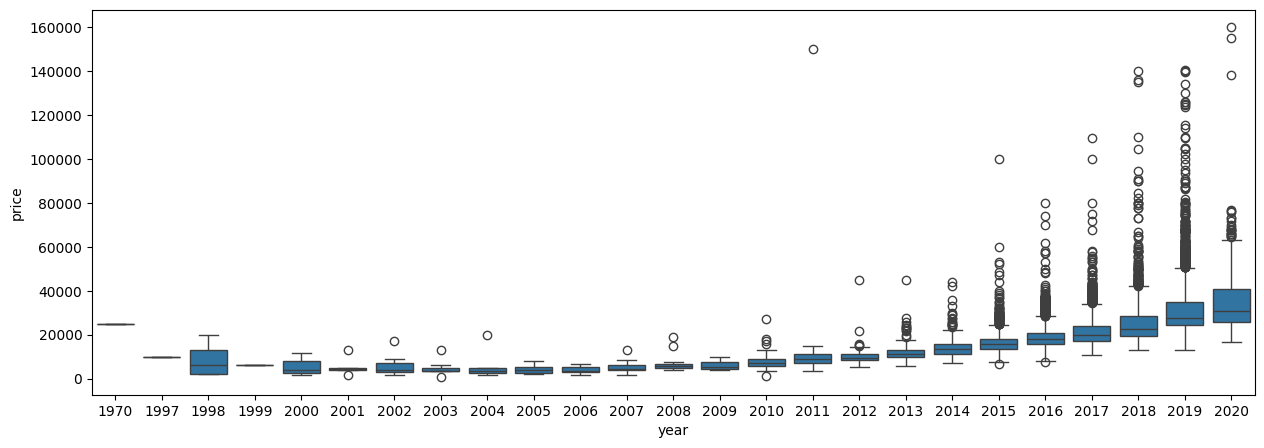

In [12]:
plt.figure(figsize = (15, 5))
sns.boxplot(y = "price", x = "year", data = df)

# 2. Регрессионные модели

In [13]:
data_train, data_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)

## Constant:

In [14]:
dummy = DummyRegressor(strategy="mean")
dummy.fit(data_train, y_train)
print(mean_squared_error(y_test, dummy.predict(data_test)))
print(mean_absolute_error(y_test, dummy.predict(data_test)))

155434271.18134543
8258.4778760893


## ConstantByGroup:

In [ ]:
group_means = y.groupby(data['year']).transform('mean')
print(mean_squared_error(y, group_means))
print(mean_absolute_error(y,group_means))

## OneParamModel

In [15]:
group = LinearRegression()
group.fit(pd.DataFrame(data_train['year']), y_train)
print(mean_squared_error(y_test, group.predict(pd.DataFrame(data_test['year']))))
print(mean_absolute_error(y_test, group.predict(pd.DataFrame(data_test['year']))))

115340706.95295471
6642.3670309920935


# 3. Линейная регрессия

Только количественные показатели:

In [16]:
lin = LinearRegression()
lin.fit(data_train.drop(["model", "transmission", "fuelType"], axis = 1), y_train)
print(mean_squared_error(y_test, lin.predict(data_test.drop(["model", "transmission", "fuelType"], axis = 1))))
print(mean_absolute_error(y_test, lin.predict(data_test.drop(["model", "transmission", "fuelType"], axis = 1))))

47096567.48349844
4065.1763655416285


In [17]:
data_train_scaled = StandardScaler().fit_transform(data_train.drop(["model", "transmission", "fuelType"], axis = 1))
data_test_scaled = StandardScaler().fit_transform(data_test.drop(["model", "transmission", "fuelType"], axis = 1))

In [18]:
lin_scaled = LinearRegression()
lin_scaled.fit(data_train_scaled, y_train)
print(mean_squared_error(y_test, lin_scaled.predict(data_test_scaled)))
print(mean_absolute_error(y_test, lin_scaled.predict(data_test_scaled)))

47615770.21813287
4048.937663935831


Качественные показатели превратим в one-hot вектора:

In [19]:
data = pd.get_dummies(data, columns=["model", "transmission", "fuelType"])
data_train_qual, data_test_qual, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)

In [20]:
lin_qual = LinearRegression()
lin_qual.fit(data_train_qual, y_train)
print(mean_squared_error(y_test, lin_qual.predict(data_test_qual)))
print(mean_absolute_error(y_test, lin_qual.predict(data_test_qual)))

37795479.78549028
3518.9126989639103


Ошибка стремится к нулю

In [21]:
data_train_qual_scaled = StandardScaler().fit_transform(data_train_qual)
data_test_qual_scaled = StandardScaler().fit_transform(data_test_qual)

In [22]:
lin_scaled = LinearRegression()
lin_scaled.fit(data_train_qual_scaled, y_train)
print(mean_squared_error(y_test, lin_scaled.predict(data_test_qual_scaled)))
print(mean_absolute_error(y_test, lin_scaled.predict(data_test_qual_scaled)))

7.518919129887545e+26
14103802081045.297


При нормализации ошибки немного выросли.

In [23]:
lin.coef_

array([ 2.03720867e+03, -1.40887336e-01, -1.06051393e+01, -1.61199608e+02,
        1.07332196e+04])

In [24]:
lin_scaled.coef_

array([ 4.19457192e+03, -2.99392985e+03, -1.20776484e+03, -2.57184553e+03,
        4.74495787e+03,  1.71489801e+14,  9.26356755e+13,  1.96743676e+14,
        8.20730516e+13,  3.75353412e+13,  4.53554996e+12,  9.06961791e+12,
        6.09070195e+13,  1.53871812e+14,  1.28235816e+13,  4.16239930e+13,
        1.06407665e+14,  1.57021919e+13,  1.14429295e+14,  7.94720179e+13,
        3.38391425e+13,  3.41380705e+13,  0.00000000e+00,  5.05636908e+13,
        5.99257075e+13,  3.67163292e+13,  5.47338814e+13,  3.32330189e+13,
       -4.21181024e-03,  1.16864295e-02,  4.53554996e+12,  4.53554996e+12,
       -4.84437408e+14, -3.13157834e+14, -1.48212972e+13, -5.01696585e+14,
       -8.76231939e+14, -2.19218239e+14, -4.46650406e+13, -8.64094265e+14])

# 4. Применение других моделей на всех показателях

In [25]:
data_train_qual_scaled.shape

(9183, 40)

In [26]:
data_test_qual_scaled.shape

(3936, 40)

In [27]:
poly = PolynomialFeatures(3, include_bias=True)
for a in (1,2,5,10):
  L1 = Lasso(alpha=a)
  model = make_pipeline(poly, L1)
  model.fit(data_train_qual_scaled, y_train)
  print("alpha =", a)
  print("MSE:", mean_squared_error(y_test, model.predict(data_test_qual_scaled)))
  print("MAE:", mean_absolute_error(y_test, model.predict(data_test_qual_scaled)))
  print("Коэффициенты модели:", model.named_steps['lasso'].coef_)
  print("Смещение модели:", model.named_steps['lasso'].intercept_, "\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.974e+10, tolerance: 1.228e+08
  model = cd_fast.enet_coordinate_descent(


alpha = 1
MSE: 19818279.266148254
MAE: 2214.7367506030337
Коэффициенты модели: [    0.          4037.63862249 -2804.34812212 ...     0.
     0.            -0.        ]
Смещение модели: 21172.108525509375 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.066e+10, tolerance: 1.228e+08
  model = cd_fast.enet_coordinate_descent(


alpha = 2
MSE: 16435134.615879245
MAE: 2170.7538891571335
Коэффициенты модели: [    0.          3141.98443879 -2725.30554902 ...     0.
     0.            -0.        ]
Смещение модели: 21485.317260202406 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.275e+10, tolerance: 1.228e+08
  model = cd_fast.enet_coordinate_descent(


alpha = 5
MSE: 15482909.943037488
MAE: 2158.633485520077
Коэффициенты модели: [    0.          1912.52435197 -2105.16724307 ...     0.
     0.            -0.        ]
Смещение модели: 21565.50267650393 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.272e+10, tolerance: 1.228e+08
  model = cd_fast.enet_coordinate_descent(


alpha = 10
MSE: 15553960.721359286
MAE: 2208.0750365632707
Коэффициенты модели: [    0.           783.39668128 -1598.75417983 ...    -0.
     0.            -0.        ]
Смещение модели: 21396.621119998985 



In [28]:
  L1 = Lasso(alpha=50)
  model = make_pipeline(poly, L1)
  model.fit(data_train_qual_scaled, y_train)
  print("alpha =", a)
  print("MSE:", mean_squared_error(y_test, model.predict(data_test_qual_scaled)))
  print("MAE:", mean_absolute_error(y_test, model.predict(data_test_qual_scaled)))
  print("Коэффициенты модели:", model.named_steps['lasso'].coef_)
  print("Смещение модели:", model.named_steps['lasso'].intercept_, "\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.730e+10, tolerance: 1.228e+08
  model = cd_fast.enet_coordinate_descent(


alpha = 10
MSE: 15034640.47056448
MAE: 2284.8381556421677
Коэффициенты модели: [   0.            0.         -497.60886071 ...    0.            0.
   -0.        ]
Смещение модели: 21488.17464993831 



In [ ]:
  poly = PolynomialFeatures(3, include_bias=True)
  L1 = Lasso(alpha=5)
  model5 = make_pipeline(poly, L1)
  model5.fit(data_train_qual, y_train)
  print("alpha =", 5)
  print("MSE:", mean_squared_error(y_test, model5.predict(data_test_qual)))
  print("MAE:", mean_absolute_error(y_test, model5.predict(data_test_qual)))
  print("Коэффициенты модели:", model5.named_steps['lasso'].coef_)
  print("Смещение модели:", model5.named_steps['lasso'].intercept_, "\n")

Дерево:

In [ ]:
tree = DecisionTreeRegressor()
tree.fit(data_train_qual_scaled, y_train)
print("MSE:", mean_squared_error(y_test, tree.predict(data_test_qual_scaled)))
print("MAE:", mean_absolute_error(y_test, tree.predict(data_test_qual_scaled)))

Случайный лес:

In [ ]:
forest = RandomForestRegressor()
forest.fit(data_train_qual_scaled, y_train)
print("MSE:", mean_squared_error(y_test, forest.predict(data_test_qual_scaled)))
print("MAE:", mean_absolute_error(y_test, forest.predict(data_test_qual_scaled)))